In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

#Nhập dữ liệu từ file excel vào dataframe
hotel = pd.read_excel('du_lieu_khach_san.xlsx') #file này phải cùng folder với file jupyter notebook
hotel.head()
#tutorial video https://www.youtube.com/watch?v=UYGwgHhazMA
# tutorial https://www.youtube.com/watch?v=N_7A3KPZIQw

,City,Hotel,Star,Price
0,Hanoi,Madana,3,1564
1,Hoi An,Crist,3,1562
2,Hai Phong,Five,2,3526
3,Hoi An,Little,4,4521
4,Hanoi,YES,4,1235


In [4]:
#vẽ biểu đồ
def plot_bar(city):
    filtered_hotel = hotel[hotel['City'] == city]
    star_counts = filtered_hotel['Star'].value_counts().sort_index()  
    # Đếm số lượng khách sạn theo số sao và sắp xếp theo số sao
    plt.bar(star_counts.index.astype(str), star_counts.values)
    plt.title(f'Count of Hotels by Star Rating in {city}')
    plt.xlabel('Star Rating')
    plt.ylabel('Count')
    plt.grid(True)
    
    #plt.bar(filtered_hotel['City'], {sum})
    #plt.title(f'Count of Hotels in {city}')
    #plt.xlabel('City')
    #plt.ylabel({sum})
    plt.show()
    
# Tạo dropdown và kết hợp với matplotlib sử dụng interact
interact(plot_bar, city=hotel['City'].unique())


interactive(children=(Dropdown(description='city', options=('Hanoi', 'Hoi An', 'Hai Phong', 'HCMc'), value='Ha…

<function __main__.plot_bar(city)>

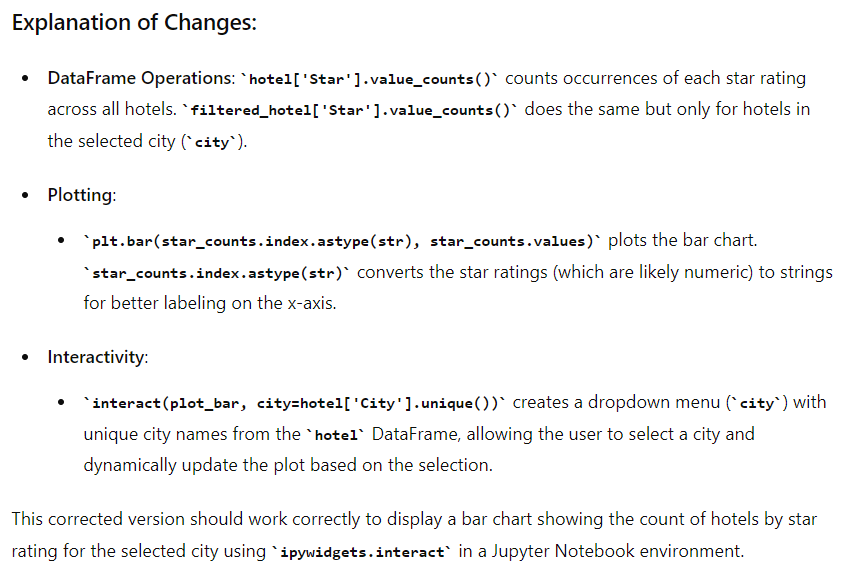

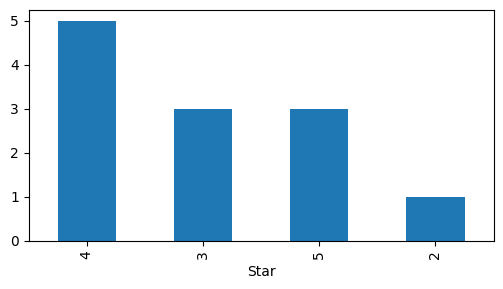

In [18]:
# Exact dữ liệu

fig = plt.figure(figsize=(6, 3))
hotel['Star'].value_counts().plot( #đếm số lượng KS lọc theo Star và vẽ ở dạng bar
    kind='bar')
plt.show() #gọi figure ra màn hình


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

# Nhập dữ liệu từ file excel vào dataframe
hotel = pd.read_excel('du_lieu_khach_san.xlsx')  # Cần đảm bảo file này ở cùng thư mục với notebook

# Function to filter data and plot both visualizations
def plot_dual_dashboard(city, star): #khai báo hàm có 2 biến city và star
    filtered_hotel = hotel[hotel['City'] == city] #Dataframe

    # Plot 1: Count of Hotels by Star Rating
    plt.figure(figsize=(5, 3))
    star_counts = filtered_hotel['Star'].value_counts().sort_index()
    plt.bar(star_counts.index.astype(str), star_counts.values.astype(int), color='green')
    plt.title(f'Count of Hotels by Star Rating in {city}')
    plt.xlabel('Star Rating')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

    # Plot 2: Top 3 Lowest Priced Hotels
    filtered_hotel_star = filtered_hotel[filtered_hotel['Star'] == star]
    top_3_lowest_priced = filtered_hotel_star.nsmallest(3, 'Price')

    # Print top 3 lowest priced hotels
    print(f'Top 3 lowest priced hotels in {city} with {star} stars:')
    print(top_3_lowest_priced[['Hotel', 'Price']])
    print()

    # Plot bar chart for top 5 lowest priced hotels
    plt.figure(figsize=(5, 3))
    plt.bar(top_3_lowest_priced['Hotel'], top_3_lowest_priced['Price'], color='green')
    plt.title(f'Top 3 Lowest Priced Hotels in {city} with {star} Stars')
    plt.xlabel('Hotel')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create interactive dashboard using interact
interact(plot_dual_dashboard, city=hotel['City'].unique(), star=hotel['Star'].unique());

interactive(children=(Dropdown(description='city', options=('Hanoi', 'Hoi An', 'Hai Phong', 'HCMc'), value='Ha…

In [14]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

# Load data
hotel = pd.read_excel('du_lieu_khach_san.xlsx')

# Initialize Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Hotel Data Dashboard"),
    html.Div([
        html.Label('Select City'),
        dcc.Dropdown(
            id='city-dropdown',
            options=[{'label': city, 'value': city} for city in hotel['City'].unique()],
            value=hotel['City'].unique()[0]  # Default value
        )
    ]),
    html.Div([
        html.Label('Select Star Rating'),
        dcc.Dropdown(
            id='star-dropdown',
            options=[{'label': str(star), 'value': star} for star in hotel['Star'].unique()],
            value=hotel['Star'].unique()[0]  # Default value
        )
    ]),
    html.Div([
        dcc.Graph(id='count-by-star-plot'),
        dcc.Graph(id='top-5-lowest-priced-plot')
    ])
])

# Callback to update 'Count of Hotels by Star Rating' plot
@app.callback(
    Output('count-by-star-plot', 'figure'),
    [Input('city-dropdown', 'value')]
)
def update_count_by_star_plot(selected_city):
    filtered_hotel = hotel[hotel['City'] == selected_city]
    star_counts = filtered_hotel['Star'].value_counts().sort_index()

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=star_counts.index.astype(str),
        y=star_counts.values,
        marker_color='skyblue'
    ))

    fig.update_layout(
        title=f'Count of Hotels by Star Rating in {selected_city}',
        xaxis_title='Star Rating',
        yaxis_title='Count',
        barmode='group'
    )

    return fig

# Callback to update 'Top 5 Lowest Priced Hotels' plot
@app.callback(
    Output('top-5-lowest-priced-plot', 'figure'),
    [Input('city-dropdown', 'value'),
     Input('star-dropdown', 'value')]
)
def update_top_5_lowest_priced_plot(selected_city, selected_star):
    filtered_hotel = hotel[(hotel['City'] == selected_city) & (hotel['Star'] == selected_star)]
    top_5_lowest_priced = filtered_hotel.nsmallest(5, 'Price')

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=top_5_lowest_priced['Hotel'],
        y=top_5_lowest_priced['Price'],
        marker_color='skyblue'
    ))

    fig.update_layout(
        title=f'Top 5 Lowest Priced Hotels in {selected_city} with {selected_star} Stars',
        xaxis_title='Hotel',
        yaxis_title='Price',
        xaxis_tickangle=-45
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [13]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

print(dash.__version__)

2.17.1
